<a href="https://colab.research.google.com/github/felipetryt12/4GeeksAcademy/blob/master/Car_sales_Extended.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [9]:
data = pd.read_csv('/content/car-sales-extended-missing-data.csv')

In [10]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [12]:
data.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [13]:
data['Doors'].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [16]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
'''from sklearn.impute import KNNImputer
import numpy as np

imputar = KNNImputer(n_neighbors=5)

num_var = data[['Doors', 'Odometer (KM)']]
num_var.columns'''

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
def numeric_histogram(df):
  for col in df.columns:
    if df[col].dtype != 'object':
      plt.figure(figsize=(8,5))
      df[col].plot(kind='hist')
      plt.title(col)
      plt.show()



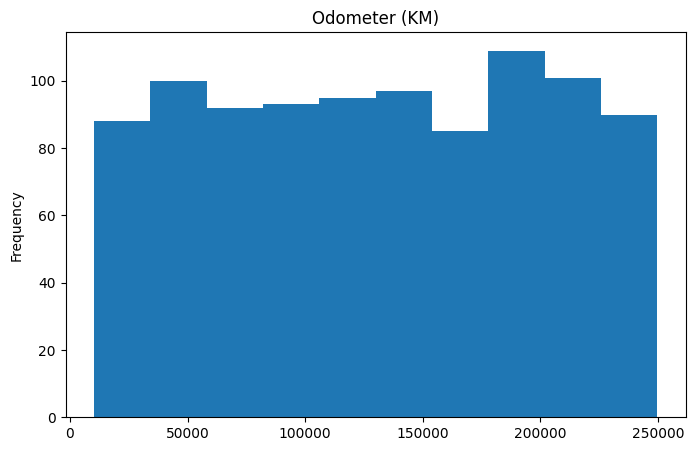

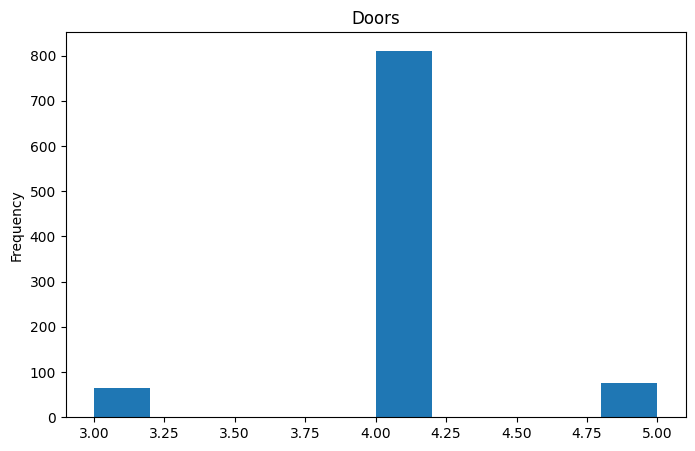

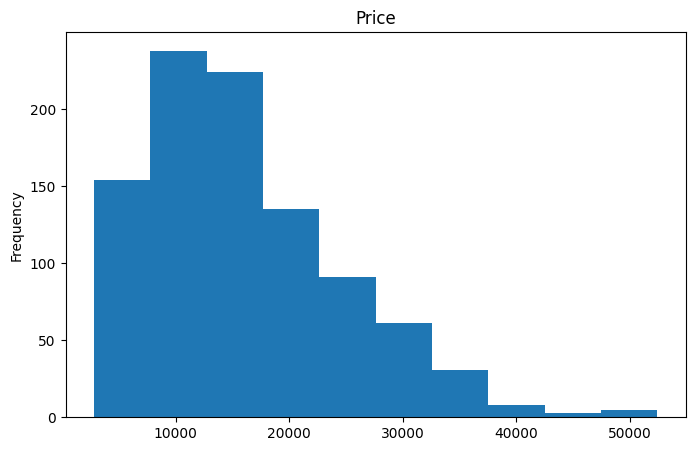

In [21]:
numeric_histogram(data)

In [25]:
def categorical_hist(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      plt.figure(figsize=(8,5))
      sns.histplot(x=df[col])
      plt.title(col)
      plt.show()

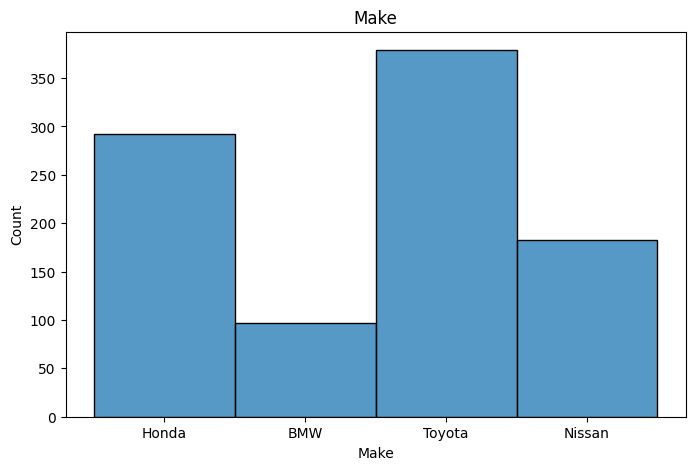

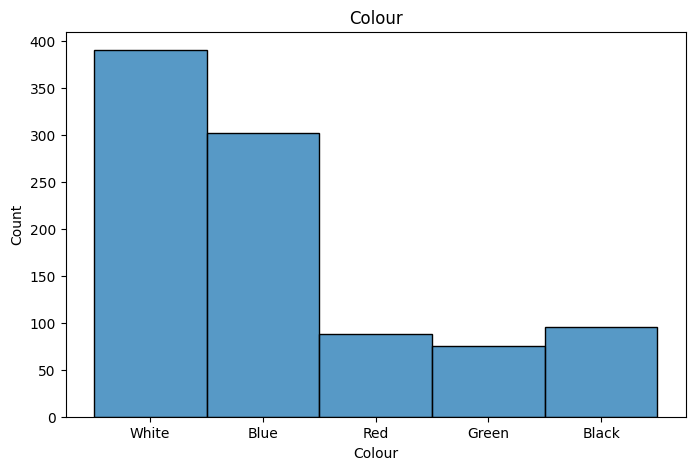

In [26]:
categorical_hist(data)

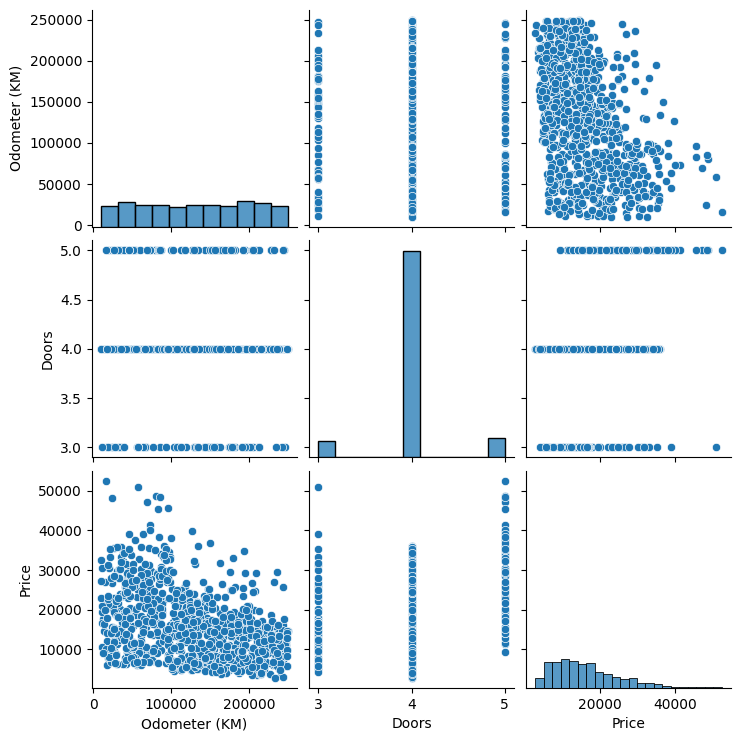

In [27]:
sns.pairplot(data)

In [28]:
def ordinal_encoding(df, categorical_columns):
    df_encoded = df.copy()
    for col in categorical_columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    return df_encoded

In [31]:
data_encoded = ordinal_encoding(data, ['Make', 'Colour'])

<Axes: >

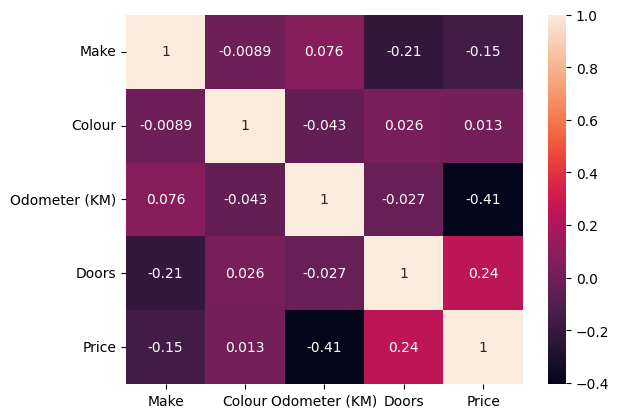

In [32]:
sns.heatmap(data_encoded.corr(), annot=True, cmap='rocket')

In [34]:
data_encoded.corr()['Price'].sort_values(ascending=False)

Price            1.000000
Doors            0.243104
Colour           0.012758
Make            -0.154032
Odometer (KM)   -0.405649
Name: Price, dtype: float64

La variable que mas se relaciona con el precio es el odometro, a medida que aumenta el odometro el precio se reduce.
La siguente variable con mas impacto es el numero de puertas, a mayor cantidad de puertas mayor precio.
el modelo es la tercera variable con mayor correlacion, es necesario identificar los codigos agregados a cada modelo para determinar cual le da un mayor y menor precio a los autos.

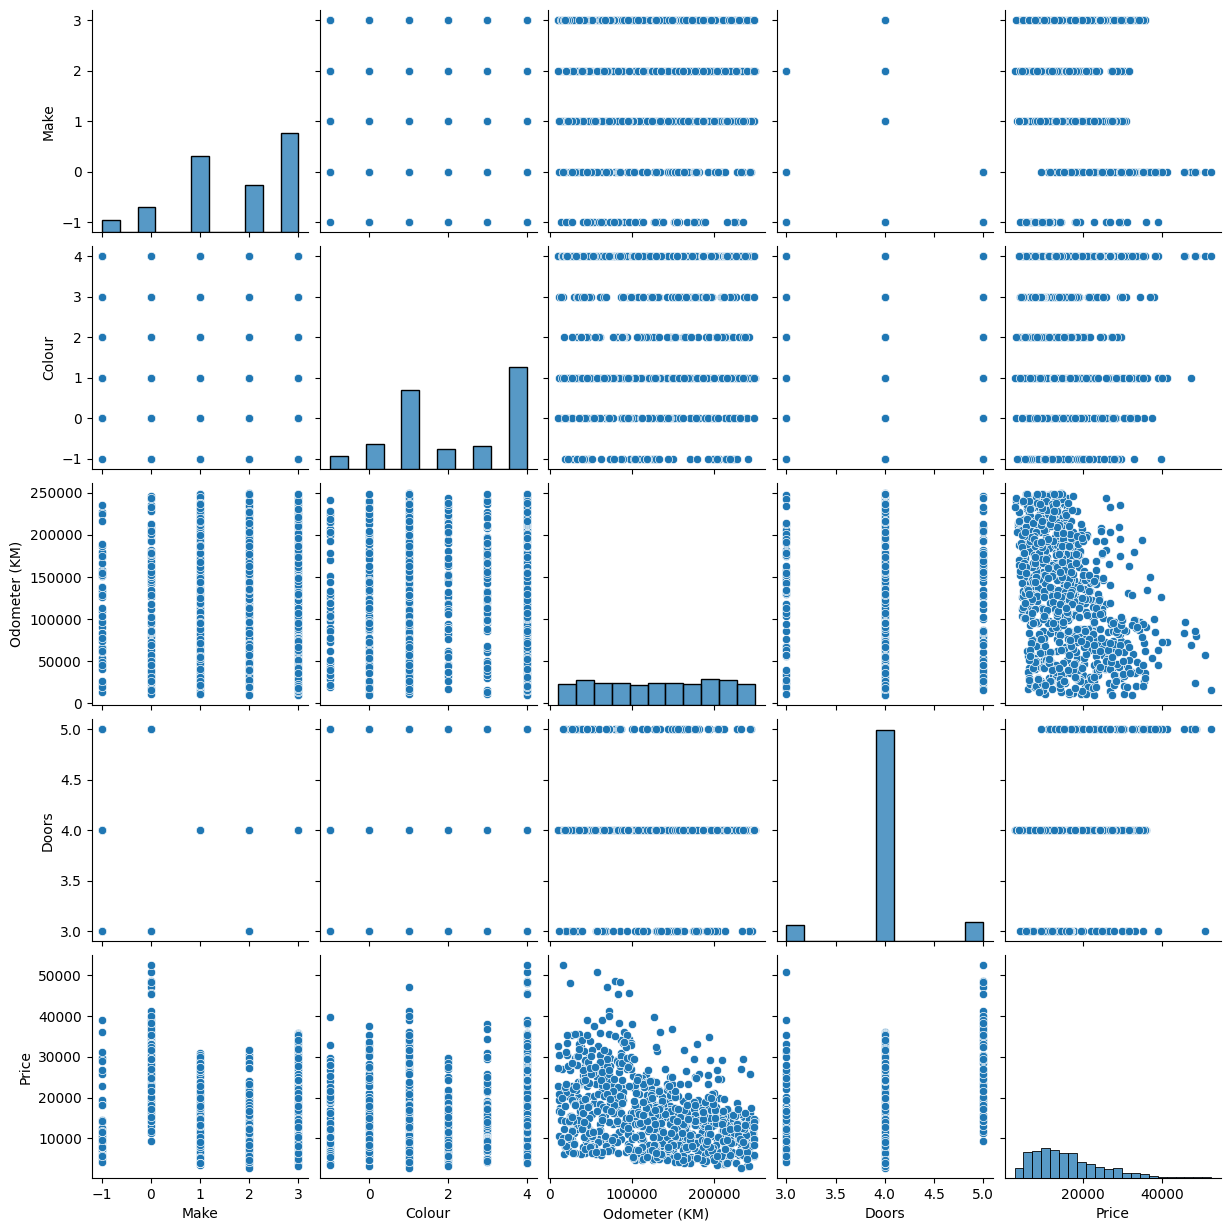

In [33]:
sns.pairplot(data_encoded)